<a href="https://colab.research.google.com/github/8noira/mysite/blob/master/prml_report_week2_part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

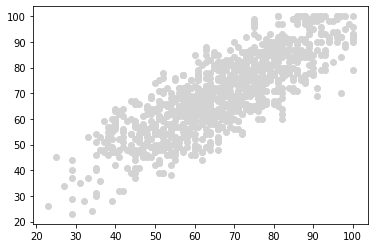

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

exams = pd.read_csv("exams.csv")
X = exams[['math score']].values
y = exams['reading score'].values
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

plt.scatter(X,y,label='training points',color='lightgray')

In [ ]:
class LinearReg:

    def __init__(self):
        self.coef_ = None
        self.intercept_ = None

    def fit(self, X, y):
        #insert w_0
        X = np.insert(X, 0, 1, axis=1)
        i = np.eye(X.shape[1])
        #Solving normal equation
        temp = np.linalg.inv(X.T @ X ) @ X.T @ y
        self.coef_ = temp[1:]
        self.intercept_ = temp[0]

In [ ]:
#design matrix(gaussian)
Phi1 = np.array([phi1(x) for x in X_train]) 
#design matrix(sigmoid)
Phi2 = np.array([phi2(x) for x in X_train])
Phi1_ts = np.array([phi1(x) for x in X_test]) 
Phi2_ts = np.array([phi2(x) for x in X_test])

In [ ]:
linear_ga=LinearReg()
linear_sig=LinearReg()
linear_ga.fit(Phi1,y_train)
linear_sig.fit(Phi2,y_train)

In [ ]:
X_fit = np.linspace(20,100, 700)
y_pred_ga=np.array([phi1(x) for x in X_fit[:,np.newaxis]]) @linear_ga.coef_+linear_ga.intercept_
y_pred_sig=np.array([phi2(x) for x in X_fit[:,np.newaxis]]) @linear_sig.coef_+linear_sig.intercept_

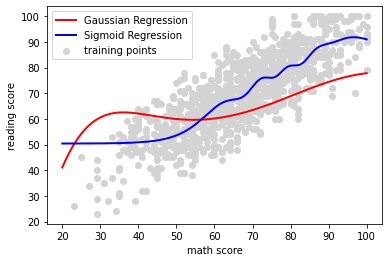

In [ ]:
plt.plot(X_fit,y_pred_ga, label='Gaussian Regression', color='r',lw=2, linestyle='-')
plt.plot(X_fit,y_pred_sig, label='Sigmoid Regression', color='b',lw=2, linestyle='-')
plt.scatter(X,y,label='training points',color='lightgray')
plt.xlabel('math score')
plt.ylabel('reading score')
plt.legend();

# Results

The graph is shown above. First, we can see that the data sets are fairly well correlated and linearly distributed.
For this, we performed linear regression using the Gaussian and sigmoid functions. First of all, we can see that the prediction of the one 
using the Gaussian function is not very accurate due to the shape of the function. On the other hand, for the sigmoid function, we can see from the graph that the prediction is not very accurate in the low score range, but it is accurate to some extent in the middle to high score range.



In [ ]:
y_pred_ga_tr=Phi1@linear_ga.coef_+linear_ga.intercept_
y_pred_sig_tr=Phi2@linear_sig.coef_+linear_sig.intercept_

y_pred_ga_ts=Phi1_ts@linear_ga.coef_+linear_ga.intercept_
y_pred_sig_ts=Phi2_ts@linear_sig.coef_+linear_sig.intercept_

from sklearn.metrics import mean_squared_error
print('Gaussian Regression MSE train:%.3f, test:%.3f' %(mean_squared_error(y_train,y_pred_ga_tr),mean_squared_error(y_test,y_pred_ga_ts)))
print('Sigmoid Regression  MSE train:%.3f, test:%.3f' %(mean_squared_error(y_train,y_pred_sig_tr),mean_squared_error(y_test,y_pred_sig_ts)))

Gaussian Regression MSE train:163.443, test:160.112
Sigmoid Regression  MSE train:75.331, test:80.388


Next, let's look at the mean square error for both the training and test data, and comparing the two, we can see that the error using the Gaussian function is about twice that of the sigmoid function. This shows the trend of the prediction accuracy when viewed graphically. Furthermore, when we look at the mean squared error for the training and test data, both are within the range of ±5, indicating that there is no obvious tendency to over-learn.